In [ ]:
# Importing the necessary libraries
import tensorflow as tf
import numpy as np
import os
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten
from tensorflow.keras.regularizers import l2

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
# Downloading the dataset
git_folder = "/content/Detection-of-Sensitive-Data-Exposure-in-Images"
if os.path.exists(git_folder) == False:
  !git clone https://github.com/amjj6/Detection-of-Sensitive-Data-Exposure-in-Images

training_folder = git_folder + "/dataset/training"
validation_folder = git_folder + "/dataset/validation"

Cloning into 'Detection-of-Sensitive-Data-Exposure-in-Images'...
remote: Enumerating objects: 1070, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 1070 (delta 4), reused 10 (delta 2), pack-reused 1057
Receiving objects: 100% (1070/1070), 236.73 MiB | 25.20 MiB/s, done.
Resolving deltas: 100% (133/133), done.
Checking out files: 100% (741/741), done.


In [ ]:
train_sensitive_dir = os.path.join(training_folder + "/sensitive")
train_nonsensitive_dir = os.path.join(training_folder + "/nonsensitive")
validation_sensitive_dir = os.path.join(validation_folder + "/sensitive")
validation_nonsensitive_dir = os.path.join(validation_folder + "/nonsensitive")


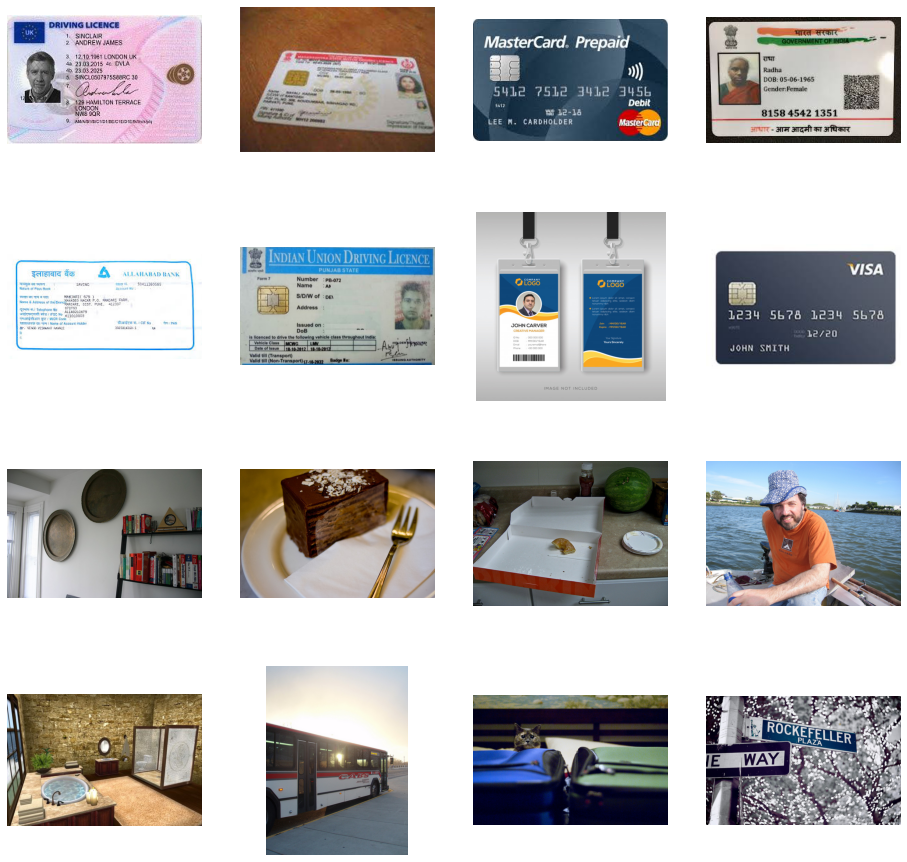

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

train_sensitive_dir = os.path.join(training_folder+"/sensitive")
train_nonsensitive_dir = os.path.join(training_folder+"/nonsensitive")
train_sensitive_names = os.listdir(train_sensitive_dir)
train_nonsensitive_names = os.listdir(train_nonsensitive_dir)

pic_index += 8
next_sensitive_pix = [os.path.join(train_sensitive_dir, fname) 
                for fname in train_sensitive_names[pic_index-8:pic_index]]
next_nonsensitive_pix = [os.path.join(train_nonsensitive_dir, fname) 
                for fname in train_nonsensitive_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_sensitive_pix+next_nonsensitive_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
tf.__version__

'2.7.0'

In [ ]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Flatten())
model.add(Dense(128,activation="relu"))

#Output layer
model.add(Dense(1,kernel_regularizer=l2(0.01),activation = "softmax"))

In [ ]:
train_dir = git_folder + "/dataset/training"
test_dir = git_folder + "/dataset/training"
train_datagen = ImageDataGenerator(rescale=(1/255.),shear_range = 0.2,zoom_range=0.2,
                                   horizontal_flip=True)
training_set = train_datagen.flow_from_directory(directory = train_dir,target_size=(64,64),
                                                batch_size=32,
                                                class_mode = "binary")
test_datagen = ImageDataGenerator(rescale=(1/255.))
test_set = test_datagen.flow_from_directory(directory = test_dir,target_size=(64,64),
                                                batch_size=32,
                                                class_mode = "binary")

Found 600 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
model.compile(optimizer = 'adam', loss = "hinge", metrics = ['accuracy'])


In [ ]:
history = model.fit(x = training_set, validation_data = test_set, epochs=15)

Epoch 1/15
19/19 [==============================] - 12s 581ms/step - loss: 1.0167 - accuracy: 0.5000 - val_loss: 1.0143 - val_accuracy: 0.5000
Epoch 2/15
19/19 [==============================] - 10s 566ms/step - loss: 1.0125 - accuracy: 0.5000 - val_loss: 1.0107 - val_accuracy: 0.5000
Epoch 3/15
19/19 [==============================] - 10s 559ms/step - loss: 1.0093 - accuracy: 0.5000 - val_loss: 1.0079 - val_accuracy: 0.5000
Epoch 4/15
19/19 [==============================] - 11s 564ms/step - loss: 1.0069 - accuracy: 0.5000 - val_loss: 1.0058 - val_accuracy: 0.5000
Epoch 5/15
19/19 [==============================] - 10s 559ms/step - loss: 1.0051 - accuracy: 0.5000 - val_loss: 1.0043 - val_accuracy: 0.5000
Epoch 6/15
19/19 [==============================] - 11s 574ms/step - loss: 1.0037 - accuracy: 0.5000 - val_loss: 1.0031 - val_accuracy: 0.5000
Epoch 7/15
19/19 [==============================] - 11s 566ms/step - loss: 1.0027 - accuracy: 0.5000 - val_loss: 1.0022 - val_accuracy: 0.5000

In [ ]:
# Save and convert the model (Used for deploying in web application)
model.save('model/image_model.h5')
print("Saved the model successfully")

!apt-get -qq install virtualenv
!virtualenv -p python3 venv
!source venv/bin/activate
!pip install -q tensorflowjs
!tensorflowjs_converter --input_format=keras /content/model/image_model.h5 /content/image_model
print("Model converted to JSON successfully")

Saved the model successfully
Selecting previously unselected package python-pip-whl.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../python-pip-whl_9.0.1-2.3~ubuntu1.18.04.5_all.deb ...
Unpacking python-pip-whl (9.0.1-2.3~ubuntu1.18.04.5) ...
Selecting previously unselected package python3-pkg-resources.
Preparing to unpack .../python3-pkg-resources_39.0.1-2_all.deb ...
Unpacking python3-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python3-virtualenv.
Preparing to unpack .../python3-virtualenv_15.1.0+ds-1.1_all.deb ...
Unpacking python3-virtualenv (15.1.0+ds-1.1) ...
Selecting previously unselected package virtualenv.
Preparing to unpack .../virtualenv_15.1.0+ds-1.1_all.deb ...
Unpacking virtualenv (15.1.0+ds-1.1) ...
Setting up python-pip-whl (9.0.1-2.3~ubuntu1.18.04.5) ...
Setting up python3-pkg-resources (39.0.1-2) ...
Setting up python3-virtualenv (15.1.0+ds-1.1) ...
Setting up virtualenv (15.1.0+ds-1.1) ...
P